In [186]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [187]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

# **************************************************************************************************************#

path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

#

df = mpt.drop_a_column(df, "Unnamed: 0")

#

df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)




# optional 1

df["data_point_number"] = df.index + 1

# optional 2

df  = mpt.counter_for_maintenance(df , "2020-02-01 00:00:00", f1_finish)
df  = mpt.counter_for_maintenance(df , f1_finish, f2_finish)
df  = mpt.counter_for_maintenance(df , f2_finish, f3_finish)
df  = mpt.counter_for_maintenance(df , f3_finish, f4_finish)
df = mpt.counter_for_maintenance(df, f4_finish, "2020-09-01 03:59:51")



#

all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =["counter",'data_point_number','TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

#

df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)

# optional 3

df_clustered = mpt.apply_kmeans_clustering(df_scaled, 5, "condition")

In [188]:
datetime_column = df.columns[0]  # Adjust this if your datetime column isn't the first one

# Add month and week number columns
df_clustered['number_of_the_month'] = df_clustered[datetime_column].dt.month
df_clustered['number_of_the_week'] = df_clustered[datetime_column].dt.isocalendar().week
df_clustered["number_of_the_day"] = df_clustered[datetime_column].dt.isocalendar().day


df_clustered['number_of_the_month'] = df_clustered['number_of_the_month'].astype('float64')
df_clustered['number_of_the_week'] = df_clustered['number_of_the_week'].astype('float64')
df_clustered['number_of_the_day'] = df_clustered['number_of_the_day'].astype('float64')

In [189]:
def aggregate(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8):
    

    result1 = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")

    probabilities = result1[0]
    y_test = result1[1]

    #probabilities = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")[0]
    #y_test = mpt.get_the_probabilities_with_logistic_regressionn(df, n1, n2, m3, n4, n5, n6, n7, n8, "no")[1]
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition(df_ed, aggregation_size)
    return result


def agg_new_deneme(penalty, C_value, solver, max_iter,df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):

    result1 = mpt.get_the_probabilities_with_logistic_regressionn_new(penalty, C_value, solver, max_iter,df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)

    probabilities = result1[0]
    y_test = result1[1]

    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_random_forest(n, f, d, s, l, df, aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_random_forest_new(n, f, d, s, l, df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result


def agg_single_tree(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8, use1, use2, use3, use4, sliding_amount):


    result1 = mpt.get_the_probabilities_with_single_tree(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes", use1, use2, use3, use4)


    probabilities = result1[0]
    y_test =result1[1]
    
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition_sliding(df_ed, aggregation_size, sliding_amount)
    return result



def plot_probabilities_by_condition(df, threshold): # tekrar yazılacak

    indices = np.arange(df.shape[0])
    
    # Create figure
    plt.figure(figsize=(8, 5))
    
    # Plot points with condition=0 and proba <= threshold in blue
    mask_0_below = (df['condition'] == 0) & (df['proba'] <= threshold)
    plt.scatter(indices[mask_0_below], df.loc[mask_0_below, 'proba'], 
                color='blue', alpha=0.7, label='condition=0')
    
    # Plot points with condition=0 and proba > threshold in red
    mask_0_above = (df['condition'] == 0) & (df['proba'] > threshold)
    plt.scatter(indices[mask_0_above], df.loc[mask_0_above, 'proba'], 
                color='red', alpha=0.7, label=f'condition=0, proba>{threshold}')
    
    # Plot points with condition=1 in black
    mask_1 = df['condition'] == 1
    plt.scatter(indices[mask_1], df.loc[mask_1, 'proba'], 
                color='black', alpha=0.7, label='condition=1')

    
    # Add labels and title
    plt.title('Probablity of Failure')
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [209]:
def calculate_scores(df):
    
    # Condition değeri 1 olan satırları bul
    condition_1_rows = df[df['condition'] == 1].index.tolist()
    
    if not condition_1_rows:
        print("Condition değeri 1 olan satır bulunamadı.")
        return
    
    # Condition 1 olan grupları bul
    groups = []
    current_group = [condition_1_rows[0]]
    
    for i in range(1, len(condition_1_rows)):
        # Eğer ardışık indeksler ise aynı gruba ekle
        if condition_1_rows[i] == condition_1_rows[i-1] + 1:
            current_group.append(condition_1_rows[i])
        else:
            # Değilse yeni grup başlat
            groups.append(current_group)
            current_group = [condition_1_rows[i]]
    
    # Son grubu eklemeyi unutma
    if current_group:
        groups.append(current_group)
    
    # Early score hesaplama (her grup için ilk 1'den önceki 75 satır)
    early_score = 0
    early_rows_count = 0
    
    for group in groups:
        # Gruptaki ilk 1'in indeksi
        first_one_idx = group[0]
        # İlk 1'den önceki 75 satır (ya da mümkün olan maksimum)
        start_idx = max(0, first_one_idx - 400)
        rows_to_consider = df.iloc[start_idx:first_one_idx]

        for _, row in rows_to_consider.iterrows():
            if row['proba'] > 0.5:
                early_score += (row['proba'] - 0.45)
                early_rows_count += 1

    # False score hesaplama (condition=0 ve proba>0.4 olan yerler için)
    false_score = 0
    false_rows_count = 0
    condition_0_rows = df[df['condition'] == 0]
    
    for _, row in condition_0_rows.iterrows():
        if row['proba'] > 0.5:
            # 0.4'ü aşan kısmı topla
            false_score += (row['proba'] - 0.45)
            false_rows_count += 1


    false_score = -1*false_score + early_score
    # Sonuçları yazdır
    print(f"Early Score: {early_score:.6f} (kullanılan satır sayısı: {early_rows_count})")
    print(f"False Score: {false_score:.6f} (kullanılan satır sayısı: {false_rows_count})")
    print(early_score + false_score)
    
    return early_score, false_score

In [191]:
import pandas as pd
import random

def select_columns(df):
    required_cols = ['condition', 'timestamp', 'Oil_temperature', 'DV_pressure']
    selected_cols = required_cols.copy()

    # Zamanla ilgili sütunlar ya da data_point_number %100 olasılık içinde seçim yapılır
    choice = random.random()

    if choice < 0.1:
        selected_cols.append('data_point_number')
    elif choice < 0.2:
        selected_cols += ['number_of_the_month', 'number_of_the_week', 'number_of_the_day']
    elif choice < 0.3:
        selected_cols.append('number_of_the_month')
    elif choice < 0.4:
        selected_cols.append('number_of_the_week')
    elif choice < 0.5:
        selected_cols.append('number_of_the_day')
    # else: %50 ihtimalle hiçbirini alma → hiçbir şey eklenmiyor

    # Cluster sütunu %20 ihtimalle alınır
    if random.random() < 0.2:
        selected_cols.append('Cluster')

    # Diğer sütunlar %35 ihtimalle alınır
    remaining_cols = [
        'TP2', 'TP3', 'H1', 'Reservoirs', 'Motor_current', 'COMP', 'DV_eletric',
        'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
        'counter'
    ]
    for col in remaining_cols:
        if random.random() < 0.35:
            selected_cols.append(col)

    selected_cols = list(dict.fromkeys(selected_cols))
    return df[selected_cols]


In [232]:
def fit_the_model_and_get_the_best_scores(w_, n_, d_, l_, t_, df, a_=[400], b_=[100]):

    score1_best = -100
    score2_best = -100
    total_score_best = -100

    opt_df = df
    opt_df_1 = df
    opt_df_2 = df

    best_set1 = []
    best_set2 = []
    best_set3 = []

    iteration = 0

    for i in n_:
        for j in d_:
            for k in l_:
                for t in t_:
                    for a in a_:
                        for b in b_:
                            for w in range(w_):
                                
                                    iteration += 1
                                    print(iteration)
                                    print()
                                    print(i,j,k, t, a, b)

                                    


                                    aggregation_size = a

                                    treshold_probability = 0.5

                                    dataframe = select_columns(df)

                                    print(dataframe.columns)

                                    aggregated_probabilities = agg_new_deneme(i, j, k, t, dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 20, 40, "yes", "yes", "yes", "no", b)

                                    score1, score2 = calculate_scores(aggregated_probabilities)

                                    total_score = score1 + score2

                                    if total_score > total_score_best and score2==0:

                                        total_score_best = total_score
                                        best_set1 = [iteration, i, j, k , t, a, b]
                                        print("better is found for total")
                                        opt_df = dataframe

                                    if score1 > score1_best:

                                        score1_best = score1
                                        best_set2 = [iteration, i, j, k , t, a, b]
                                        print("better is found for 1")
                                        opt_df_1 = dataframe


                                    if score2 != 0:

                                        break

                                    else:

                                        score2_best = score2
                                        best_set3 = [iteration, i, j, k , t, a, b]
                                        print("better is found for 2")
                                        opt_df_2 = dataframe


                                    print()
                                    print("********************************************************************************************************************************************************************************************************************************************************************************")
                                    print()

    print(best_set1, total_score_best)
    print(best_set2, score1_best)
    print(best_set3, score2_best)

    return opt_df, opt_df_1, opt_df_2

                

In [233]:
df = df_clustered.copy()

In [234]:
df.columns.tolist()

['timestamp',
 'TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Pressure_switch',
 'Oil_level',
 'Caudal_impulses',
 'condition',
 'data_point_number',
 'counter',
 'Cluster',
 'number_of_the_month',
 'number_of_the_week',
 'number_of_the_day']

In [239]:
list1 = ["l2"]
list2 = [1, 0.5, 0.75, 0.8, 0.6]
list3 = ["lbfgs", "liblinear", "saga"]
list4 = [50, 100, 250, 500]
list5 = [400, 800, 200]
list6 = [100, 50, 75, 150]



list1 = ["l2"]
list2 = [1, 0.75, 0.5]
list3 = ["lbfgs", "liblinear", "saga"]
list4 = [50, 100, 500, 1000]
list5 = [400]
list6 = [100]

In [240]:
opt_df1, opt_df_p, opt_df_n = fit_the_model_and_get_the_best_scores(1, list1, list2, list3 , list4 , df, list5, list6)

1

l2 1 lbfgs 50 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'Towers',
       'Oil_level', 'counter'],
      dtype='object')
5
(5, 5)
                 Coefficient  p_value
DV_pressure         1.450849      0.0
Oil_temperature     1.192912      0.0
counter             0.846797      0.0
Towers             -0.644803      0.0
Oil_level          -0.389955      0.0
Intercept: -4.140328924604641
R-squareddd: 0.8947156117586672
F-Value: 268012.5841541161
Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Score: 0.000000 (kullanılan satır sayısı: 0)
0
better is found for total
better is found for 1
better is found for 2

********************************************************************************************************************************************************************************************************************************************************************************

2

l2 1 lbfgs 100 400 100
Index(['condition', 'timestamp', 'Oil_tempe

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


6
(6, 6)
                 Coefficient  p_value
LPS                -5.414566      0.0
TP3                -1.279009      0.0
Oil_temperature     1.042366      0.0
DV_pressure         1.011876      0.0
H1                 -0.916862      0.0
Pressure_switch     0.010292      0.0
Intercept: -5.731327101839343
R-squareddd: 0.8995345130594556
F-Value: 235315.7987375598
Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Score: -0.062183 (kullanılan satır sayısı: 1)
-0.06218312625385464
10

l2 1 saga 100 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'TP3',
       'COMP', 'DV_eletric', 'MPG', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


8
(9, 9)
                 Coefficient   p_value
COMP               -2.339539  0.000000
Pressure_switch     1.243691  0.000000
Oil_temperature     1.166133  0.000000
DV_pressure         1.037023  0.000000
DV_eletric         -0.911606  0.000000
TP3                -0.707731  0.000000
MPG                -0.619906  0.000370
Oil_level           0.188807  0.000015
Caudal_impulses     0.188807  0.000015
Intercept: -4.4804092999311464
R-squareddd: 0.8973832178358894
F-Value: 153218.13742725446
Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Score: -0.723778 (kullanılan satır sayısı: 3)
-0.7237783549160806
11

l2 1 saga 500 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_month', 'TP3', 'H1', 'DV_eletric', 'MPG',
       'Pressure_switch', 'Oil_level'],
      dtype='object')
9
(9, 9)
                     Coefficient  p_value
DV_eletric             -2.365688      0.0
Oil_temperature         1.851504      0.0
TP3                    -1.211315 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7
(7, 7)
                    Coefficient  p_value
DV_eletric             2.451185      0.0
counter                2.115013      0.0
DV_pressure            1.483736      0.0
LPS                    1.154987      0.0
number_of_the_week     0.730563      0.0
Pressure_switch        0.587802      0.0
Oil_temperature        0.541735      0.0
Intercept: -22.086986333311533
R-squareddd: 0.9254791334556647
F-Value: 279762.3966925778
Early Score: 61.388438 (kullanılan satır sayısı: 290)
False Score: -753.001321 (kullanılan satır sayısı: 2207)
-691.6128825490313
14

l2 0.75 lbfgs 100 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'COMP',
       'DV_eletric', 'Caudal_impulses'],
      dtype='object')
5
(5, 5)
                 Coefficient  p_value
COMP               -2.225637      0.0
DV_pressure         1.237759      0.0
Oil_temperature     0.541862      0.0
Caudal_impulses     0.469469      0.0
DV_eletric          0.425062      0.0
Intercept: -3.8435950484860584
R-squar

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


7
(7, 7)
                 Coefficient  p_value
H1                 -1.453850      0.0
TP2                -1.263730      0.0
DV_pressure         1.227976      0.0
COMP               -1.142963      0.0
Oil_temperature     1.087867      0.0
TP3                -0.396549      0.0
Motor_current      -0.229490      0.0
Intercept: -4.664404544668939
R-squareddd: 0.8981146582119018
F-Value: 198573.2220982634
Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Score: -0.134783 (kullanılan satır sayısı: 1)
-0.13478310344284578
22

l2 0.75 saga 100 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'TP2',
       'TP3', 'H1', 'Motor_current', 'Towers', 'MPG'],
      dtype='object')
8
(8, 8)
                 Coefficient  p_value
H1                 -1.549237      0.0
TP2                -1.240733      0.0
DV_pressure         1.227553      0.0
Oil_temperature     1.092081      0.0
MPG                -0.819881      0.0
TP3                -0.400718      0.0
Motor_current      

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


9
(9, 9)
                   Coefficient  p_value
data_point_number    14.152753      0.0
counter               3.470477      0.0
Cluster               2.970364      0.0
COMP                 -2.135438      0.0
MPG                  -2.001866      0.0
Motor_current        -1.767882      0.0
Caudal_impulses       1.733841      0.0
Oil_temperature       1.232851      0.0
DV_pressure           0.389264      0.0
Intercept: -12.279856788493964
R-squareddd: 0.9342994438722864
F-Value: 249153.88982580343
Early Score: 149.400451 (kullanılan satır sayısı: 400)
False Score: -1128.627885 (kullanılan satır sayısı: 2823)
-979.2274335355049
better is found for 1
34

l2 0.5 saga 100 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'data_point_number', 'Cluster', 'Motor_current', 'COMP', 'Towers',
       'Caudal_impulses'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


8
(8, 8)
                   Coefficient   p_value
COMP                 -4.249494  0.000000
Cluster               2.846898  0.000000
Motor_current        -1.571825  0.000000
Oil_temperature       1.366437  0.000000
Caudal_impulses       1.067760  0.000000
data_point_number     0.298742  0.000000
DV_pressure           0.139374  0.000000
Towers                0.004178  0.000222
Intercept: -9.212147606820945
R-squareddd: 0.9040522330289448
F-Value: 185722.5146686331
Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Score: 0.000000 (kullanılan satır sayısı: 0)
0
better is found for 2

********************************************************************************************************************************************************************************************************************************************************************************

35

l2 0.5 saga 500 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure',
       'number_of_the_month', 'LPS', 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5
(5, 5)
                     Coefficient  p_value
number_of_the_month    11.465579      0.0
counter                 7.064392      0.0
LPS                     1.542618      0.0
DV_pressure             1.297824      0.0
Oil_temperature         1.144593      0.0
Intercept: -66.14499576012689
R-squareddd: 0.9302980347564531
F-Value: 420931.3082871125
Early Score: 219.999979 (kullanılan satır sayısı: 400)
False Score: -1963.586132 (kullanılan satır sayısı: 4146)
-1743.5861530543589
better is found for 1
36

l2 0.5 saga 1000 400 100
Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'LPS',
       'Oil_level'],
      dtype='object')
4
(4, 4)
                 Coefficient  p_value
DV_pressure         1.506482      0.0
LPS                 0.926888      0.0
Oil_temperature     0.804888      0.0
Oil_level          -0.162878      0.0
Intercept: -4.483189681162461
R-squareddd: 0.8955331039436224
F-Value: 337947.9912415578
Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Scor

Index(['condition', 'timestamp', 'Oil_temperature', 'DV_pressure', 'Towers',
       'Oil_level', 'counter'],
      dtype='object')
5
(5, 5)
                 Coefficient  p_value
DV_pressure         1.450849      0.0
Oil_temperature     1.192912      0.0
counter             0.846797      0.0
Towers             -0.644803      0.0
Oil_level          -0.389955      0.0
Intercept: -4.140328924604641
R-squareddd: 0.8947156117586672
F-Value: 268012.5841541161


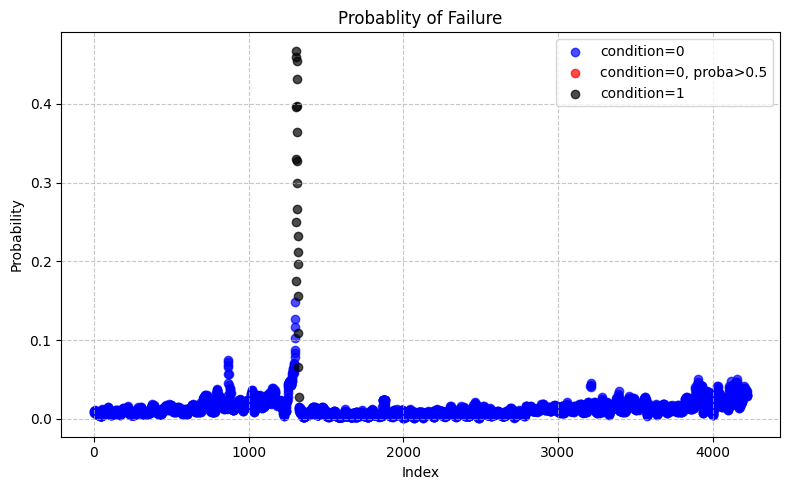

Early Score: 0.000000 (kullanılan satır sayısı: 0)
False Score: 0.000000 (kullanılan satır sayısı: 0)
0
(0, 0)


In [242]:
a = 400
b = 100

aggregation_size = a

treshold_probability = 0.5

dataframe = opt_df1

print(dataframe.columns)

aggregated_probabilities = agg_new_deneme("l2", 1, "lbfgs", 50, dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 20, 40, "yes", "yes", "yes", "no", b)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

print(calculate_scores(aggregated_probabilities))